In [1]:
from jax import numpy as np
import jax
import matplotlib.pyplot as plt

In [2]:
def helmholtz(length, ngrid, omega, mu, eps):
    
    grid = np.linspace(0, length, ngrid)
    mu = jax.vmap(mu)(grid)
    eps = jax.vmap(eps)(grid)
    delta = length / (ngrid - 1)
    
    D = (np.diag(np.full(ngrid, -1)) + np.diag(np.ones(ngrid - 1), k=1))[:-1] / delta
    DinvMD = D[:-1, :-1] @ np.diag(1 / mu[:-1]) @ D
    T1 = np.pad(DinvMD, ((1, 1), (0, 0)))
    T2 = omega**2 * eps * np.eye(ngrid)
    A = T1 + T2
    A = jax.ops.index_update(A, jax.ops.index[0], np.zeros(ngrid).at[0].add(1))
    A = jax.ops.index_update(A, jax.ops.index[-1], np.zeros(ngrid).at[-1].add(1).at[-2].add(-1))
    
    b = np.zeros(ngrid).at[0].add(1)

    sol = np.linalg.solve(A, b)
    return grid, sol

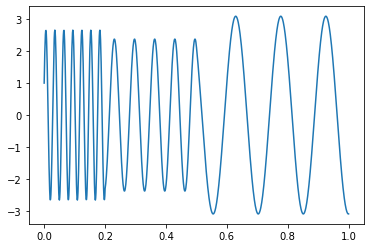

In [6]:
plt.plot(*helmholtz(1, 1000, 30, lambda x: np.where(x < 0.2, 5, 1), lambda x: np.where(x < .5, 10, 2)))